In [1]:
# Q: 2016-2021 賽季 Stephen Curry 的哪一個數據跟跟 輸贏最有關係

import numpy as np
import pandas as pd
import seaborn as sns #Seaborn是一種基於 matplotlib 的圖形 可視化 python libraty

# DATA retreived from "https://www.basketball-reference.com/", "Stephen Curry 2016 - 2021 Game"
# CODING: EGG-HUANG.

#file: Curry_2016.csv
#file: Curry_2017.csv
#file: Curry_2018.csv
#file: Curry_2019.csv
#file: Curry_2020.csv

#only import ['Opp','3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL']
#FG: field goals, FGA: field goals attempt, 3P: 3-P field goals, 3PA, FT: Free throw
#2016 data
data_2016 = pd.read_csv('Curry_2016.csv', usecols=['Opp','3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL'])

#check point
#print('info: \n', data_2016.info()) #info 可以了解數據
#print('head: 節錄前面 \n', data_2016.head()) #head 可以只先節錄前面

#2017 data
data_2017 = pd.read_csv('Curry_2017.csv', usecols=['Opp','3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL'])

#print('info: \n', data_2017.info()) #info 可以了解數據
#print('head: 節錄前面 \n', data_2017.head()) #head 可以只先節錄前面

#2018 data
data_2018 = pd.read_csv('Curry_2018.csv', usecols=['Opp','3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL'])

#print('info: \n', data_2018.info()) #info 可以了解數據
#print('head: 節錄前面 \n', data_2018.head()) #head 可以只先節錄前面

#2019 data
data_2019 = pd.read_csv('Curry_2019.csv', usecols=['Opp','3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL'])

#print('info: \n', data_2019.info()) #info 可以了解數據
#print('head: 節錄前面 \n', data_2019.head()) #head 可以只先節錄前面

#2020 data
data_2020 = pd.read_csv('Curry_2020.csv', usecols=['Opp','3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL'])

#print('info: \n', data_2020.info()) #info 可以了解數據
#print('head: 節錄前面 \n', data_2020.head()) #head 可以只先節錄前面

#上下合併
data_2016_to_2021 = pd.concat([data_2016, data_2017, data_2018, data_2019, data_2020]).reset_index(drop=True)
#print(data_2016_to_2021.info())
#print(data_2016_to_2021.head())

#把 W or L 後面的數字剩下 W or L
data_2016_to_2021['WorL'] = data_2016_to_2021['WorL'].str.get(0) #只取第一個字母

#python的字串處理在pandas內不能直接使用，需要先.str轉資料類型
data_2016_to_2021['WorL'] = data_2016_to_2021["WorL"].str.replace ('W', '1') #後面取代前面
data_2016_to_2021['WorL'] = data_2016_to_2021['WorL'].str.replace ('L', '0') #後面取代前面

print(data_2016_to_2021.info())
print(data_2016_to_2021.head(10)) #先看前10筆 data
print(data_2016_to_2021.dtypes, '\n \n') #搞清楚  data type

# datatype 轉換
# The simplest way to convert a pandas column of data to a different type is to use astype()
data_2016_to_2021['WorL'] = data_2016_to_2021['WorL'].astype('int') #把 WorL 從 obj轉換成 int
print('converted data dtype: \n', data_2016_to_2021.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Opp     374 non-null    object 
 1   WorL    374 non-null    object 
 2   FG      259 non-null    float64
 3   FGA     259 non-null    float64
 4   3P      259 non-null    float64
 5   3PA     259 non-null    float64
 6   3P%     258 non-null    float64
 7   FT      259 non-null    float64
 8   PTS     259 non-null    float64
dtypes: float64(7), object(2)
memory usage: 26.4+ KB
None
   Opp WorL    FG   FGA    3P   3PA    3P%   FT   PTS
0  SAS    0   9.0  18.0   3.0  10.0  0.300  5.0  26.0
1  NOP    1   8.0  19.0   4.0  10.0  0.400  3.0  23.0
2  PHO    1   9.0  17.0   5.0   8.0  0.625  5.0  28.0
3  POR    1  10.0  21.0   5.0  10.0  0.500  3.0  28.0
4  OKC    1   6.0  14.0   2.0   6.0  0.333  7.0  21.0
5  LAL    0   5.0  17.0   0.0  10.0  0.000  3.0  13.0
6  NOP    1  16.0  26.0  13.0  17.0  0.765  1.0  46.0

correlation table: 
            3P%       PTS        FG       FGA        3P       3PA        FT  \
3P%   1.000000  0.590668  0.557411  0.074867  0.782780  0.181178  0.048135   
PTS   0.590668  1.000000  0.931233  0.673823  0.790213  0.607862  0.520582   
FG    0.557411  0.931233  1.000000  0.740274  0.741926  0.573299  0.225128   
FGA   0.074867  0.673823  0.740274  1.000000  0.498743  0.753594  0.160107   
3P    0.782780  0.790213  0.741926  0.498743  1.000000  0.722338  0.111328   
3PA   0.181178  0.607862  0.573299  0.753594  0.722338  1.000000  0.116702   
FT    0.048135  0.520582  0.225128  0.160107  0.111328  0.116702  1.000000   
WorL  0.292883  0.106511  0.048372 -0.144420  0.147768 -0.074623  0.104176   

          WorL  
3P%   0.292883  
PTS   0.106511  
FG    0.048372  
FGA  -0.144420  
3P    0.147768  
3PA  -0.074623  
FT    0.104176  
WorL  1.000000   




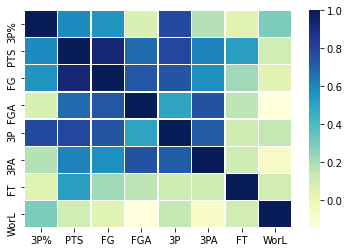

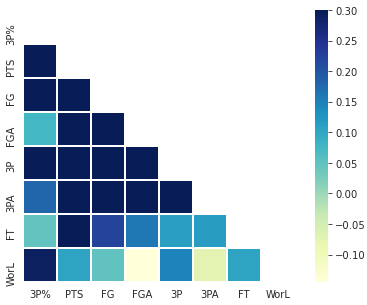

In [2]:
#關於 Seaborn 圖的應用
import seaborn as sns
import matplotlib.pyplot as plt

data_corr = data_2016_to_2021[['3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL']].corr(method='pearson')
print('correlation table: \n', data_corr, '\n\n')

#畫出第一個圖了
#corr_heatmap = sns.heatmap(data_corr, center=0)

#Add lines between each cell
#ax = sns.heatmap(flights, linewidths=.5)
#corr_heatmap = sns.heatmap(data_corr, center=0, linewidths=0.5)

#Use a different colormap:
#ax = sns.heatmap(flights, cmap="YlGnBu")
corr_heatmap = sns.heatmap(data_corr, linewidths=0.5, cmap="YlGnBu")

#Use a mask to plot only part of a matrix
"""
CODE:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)"""

mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(data_corr, linewidths=0.5, cmap="YlGnBu", mask=mask, vmax=.3, square=True)

point_mean: 27.223938223938223 
 point_std: 9.29678855592259 

0   -0.131652
1   -0.454344
2    0.083476
3    0.083476
4   -0.669472
5   -1.529984
6    2.019629
7   -0.346780
8    0.621296
9    0.298604
Name: point_norm, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


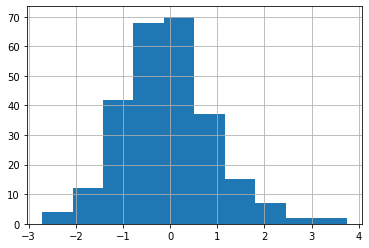

In [3]:
#一些統計值
point_mean = data_2016_to_2021['PTS'].mean()
point_std = data_2016_to_2021['PTS'].std()
print('point_mean:', point_mean, '\n' ,'point_std:', point_std, '\n')

#標準化
data_2016_to_2021['point_norm'] = ((data_2016_to_2021['PTS']-point_mean)/point_std) #normalization 標準化 並且存在新的 norm
print(data_2016_to_2021['point_norm'].head(10))
print(data_2016_to_2021['point_norm'].hist()) #畫出標準化後的直條圖

correlation table: 
            3P%       PTS        FG       FGA        3P       3PA        FT  \
3P%   1.000000  0.590668  0.557411  0.074867  0.782780  0.181178  0.048135   
PTS   0.590668  1.000000  0.931233  0.673823  0.790213  0.607862  0.520582   
FG    0.557411  0.931233  1.000000  0.740274  0.741926  0.573299  0.225128   
FGA   0.074867  0.673823  0.740274  1.000000  0.498743  0.753594  0.160107   
3P    0.782780  0.790213  0.741926  0.498743  1.000000  0.722338  0.111328   
3PA   0.181178  0.607862  0.573299  0.753594  0.722338  1.000000  0.116702   
FT    0.048135  0.520582  0.225128  0.160107  0.111328  0.116702  1.000000   
WorL  0.292883  0.106511  0.048372 -0.144420  0.147768 -0.074623  0.104176   

          WorL  
3P%   0.292883  
PTS   0.106511  
FG    0.048372  
FGA  -0.144420  
3P    0.147768  
3PA  -0.074623  
FT    0.104176  
WorL  1.000000   


W or L ROW: 
 3P%     0.292883
PTS     0.106511
FG      0.048372
FGA    -0.144420
3P      0.147768
3PA    -0.074623
FT  

<AxesSubplot:>

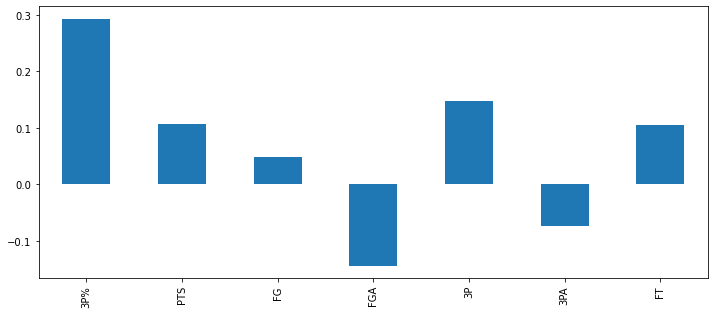

In [4]:
#Correlation to winning
#'3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL' correlation to winning

data_corr = data_2016_to_2021[['3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL']].corr(method='pearson')
print('correlation table: \n', data_corr, '\n\n')

#only pick up W or L's correlation
corr_WorL = data_corr.loc['WorL']
print('W or L ROW: \n', corr_WorL, '\n\n')

corr_WorL = corr_WorL.iloc[0:7]
print ('pick up 1~7:\n', corr_WorL, '\n\n')

corr_WorL.plot.bar(figsize = (12,5))


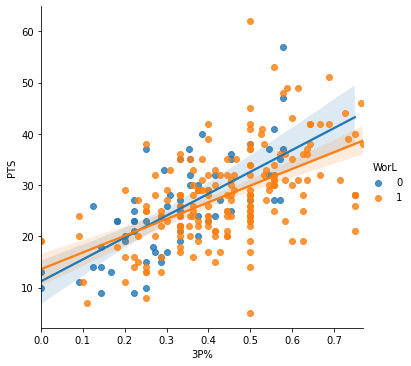

In [5]:
# data_2016_to_2021[['3P%','PTS','FG','FGA','3P','3PA','FT', 'WorL']]
PTS_relation = sns.lmplot(x="3P%", y="PTS", hue="WorL", data=data_2016_to_2021)

<AxesSubplot:xlabel='FT', ylabel='WorL'>

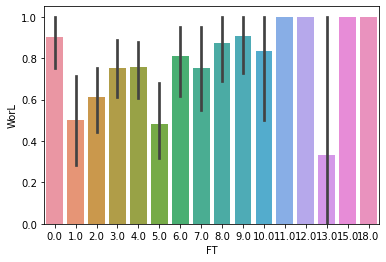

In [9]:
# barplot code
# with_hue = sns.barplot(x="sex", y="survived", hue='class', data=titanic)
# print('with Hue:', with_hue)

sns.barplot(x='FT', y='WorL', data=data_2016_to_2021)
